In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- Paths ----
IN_PATH = "../Circumplex Model/Output/mentalbert_7labels_with_va.csv"   # from previous step
OUT_DIR = "../Circumplex Model/Output/7 Labels"
import os; os.makedirs(OUT_DIR, exist_ok=True)

# ---- Load dataset ----
df = pd.read_csv(IN_PATH)
print(df.columns.tolist())
print(df[["subreddit", "valence", "arousal"]].head())

# ---- Ensure required columns exist ----
assert "subreddit" in df.columns, "Missing 'subreddit' column."
assert "valence" in df.columns and "arousal" in df.columns, "Missing valence/arousal columns."

# ---- Ensure valence/arousal in [0,1] ----
print(df[["valence", "arousal"]].describe())

['subreddit', 'title', 'clean_text', 'url', 'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise', 'predicted_emotion', 'top3_emotions', 'valence', 'arousal', 'valence_norm', 'arousal_norm', 'quadrant']
  subreddit   valence   arousal
0      ADHD -0.053029 -0.612822
1      ADHD -0.463809 -0.139381
2      ADHD -0.022548 -0.518380
3      ADHD -0.509850  0.123208
4      ADHD -0.059940 -0.625936
            valence       arousal
count  95250.000000  95250.000000
mean      -0.176465     -0.089540
std        0.440582      0.466963
min       -0.892397     -0.627682
25%       -0.573636     -0.551897
50%       -0.086527     -0.216424
75%       -0.016553      0.380840
max        0.956770      0.746513


Quadrant distribution:
                    quadrant  count  percentage
0   Q3: Negative–Low Arousal  74234       77.94
1  Q4: Negative–High Arousal  11978       12.58
2  Q1: Positive–High Arousal   5368        5.64
3   Q2: Positive–Low Arousal   3670        3.85


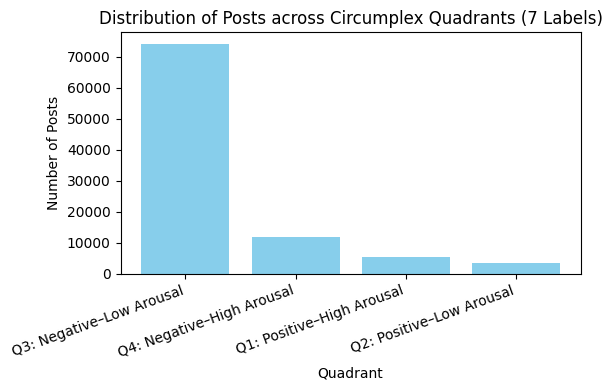


Mean Valence & Arousal by Quadrant:
                           valence  arousal
quadrant                                   
Q1: Positive–High Arousal    0.747    0.613
Q2: Positive–Low Arousal     0.637    0.362
Q3: Negative–Low Arousal    -0.209   -0.275
Q4: Negative–High Arousal   -0.641    0.607


In [2]:
# ---- Check how many posts fall into each quadrant ----
quad_counts = df["quadrant"].value_counts().reset_index()
quad_counts.columns = ["quadrant", "count"]
quad_counts["percentage"] = (quad_counts["count"] / len(df) * 100).round(2)

print("Quadrant distribution:")
print(quad_counts)

# ---- Plot quadrant distribution ----
plt.figure(figsize=(6,4))
plt.bar(quad_counts["quadrant"], quad_counts["count"], color="skyblue")
plt.title("Distribution of Posts across Circumplex Quadrants (7 Labels)")
plt.xlabel("Quadrant")
plt.ylabel("Number of Posts")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

# ---- Mean valence and arousal by quadrant ----
quad_means = df.groupby("quadrant")[["valence", "arousal"]].mean().round(3)
print("\nMean Valence & Arousal by Quadrant:")
print(quad_means)


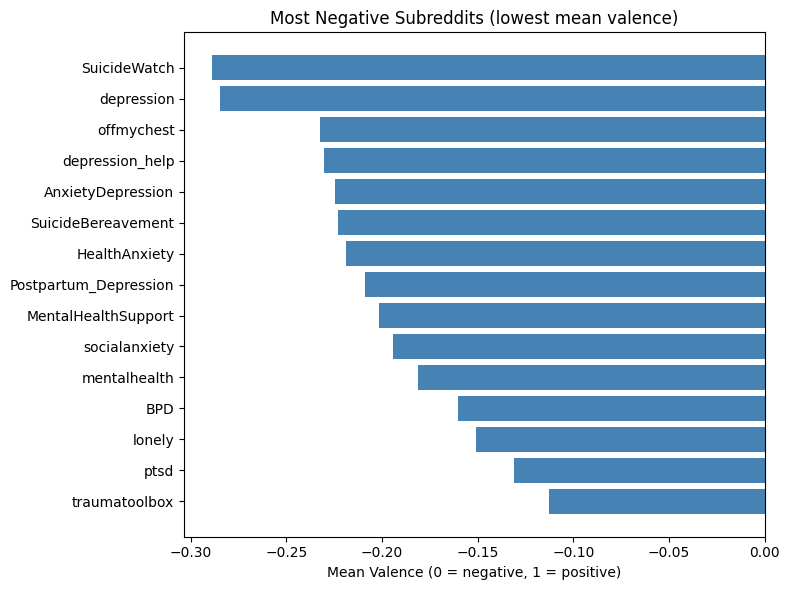

✅ Saved → ../Circumplex Model/Output/7 Labels/top15_most_negative_subreddits.png


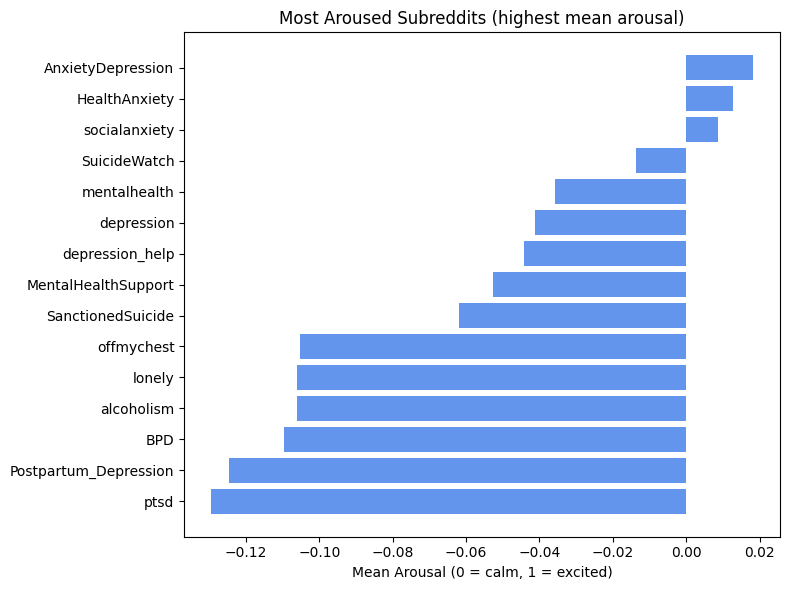

✅ Saved → ../Circumplex Model/Output/7 Labels/top15_highest_arousal_subreddits.png


In [3]:
# ---- Compute subreddit-level means ----
sub_means = df.groupby("subreddit")[["valence", "arousal"]].mean().reset_index()

# ---- Most Negative Subreddits ----
top_neg = sub_means.sort_values("valence").head(15)
plt.figure(figsize=(8,6))
plt.barh(top_neg["subreddit"], top_neg["valence"], color="steelblue")
plt.title("Most Negative Subreddits (lowest mean valence)")
plt.xlabel("Mean Valence (0 = negative, 1 = positive)")
plt.gca().invert_yaxis()
plt.tight_layout()
neg_path = os.path.join(OUT_DIR, "top15_most_negative_subreddits.png")
plt.savefig(neg_path, dpi=200, bbox_inches="tight")
plt.show()
print(f"✅ Saved → {neg_path}")

# ---- Most Aroused Subreddits ----
top_aroused = sub_means.sort_values("arousal", ascending=False).head(15)
plt.figure(figsize=(8,6))
plt.barh(top_aroused["subreddit"], top_aroused["arousal"], color="cornflowerblue")
plt.title("Most Aroused Subreddits (highest mean arousal)")
plt.xlabel("Mean Arousal (0 = calm, 1 = excited)")
plt.gca().invert_yaxis()
plt.tight_layout()
aro_path = os.path.join(OUT_DIR, "top15_highest_arousal_subreddits.png")
plt.savefig(aro_path, dpi=200, bbox_inches="tight")
plt.show()
print(f"✅ Saved → {aro_path}")


Unique quadrants: ['Q1: Positive–High Arousal', 'Q2: Positive–Low Arousal', 'Q3: Negative–Low Arousal', 'Q4: Negative–High Arousal']
✅ Saved → ../Circumplex Model/Output/7 Labels/subreddit_quadrant_proportions.csv


quadrant,subreddit,Q3: Negative–Low Arousal,Q4: Negative–High Arousal,Q2: Positive–Low Arousal,Q1: Positive–High Arousal
0,ADHD,0.820463,0.060788,0.055133,0.063615
1,ADHD_Programmers,0.826110,0.031033,0.062600,0.080257
2,ADHDparenting,0.893657,0.030317,0.037780,0.038246
3,AnxietyDepression,0.705272,0.198243,0.034271,0.062214
4,BPD,0.805136,0.112039,0.031621,0.051204


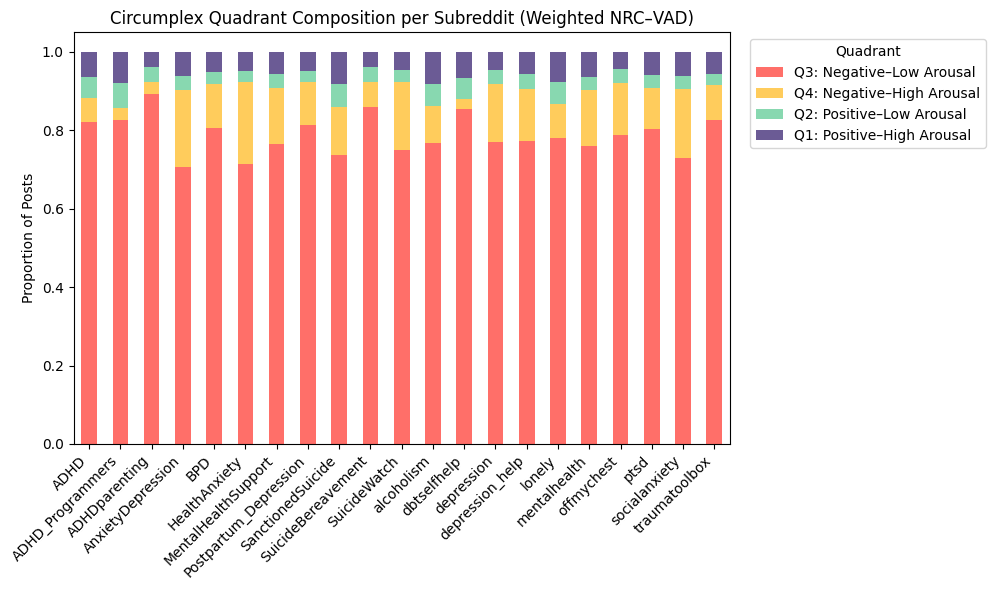

✅ Saved plot → ../Circumplex Model/Output/7 Labels/quadrant_mix_by_subreddit.png


In [4]:
# ==== Cell 4 (fixed): Calculate quadrant proportions per subreddit ====

# Sanity check: what quadrant labels exist?
print("Unique quadrants:", sorted(df["quadrant"].dropna().unique().tolist()))

# Desired column order (same names used in previous cells)
quad_order = [
    "Q3: Negative–Low Arousal",
    "Q4: Negative–High Arousal",
    "Q2: Positive–Low Arousal",
    "Q1: Positive–High Arousal",
]

# ---- Counts by subreddit x quadrant via pivot_table (avoids duplicate column on reset) ----
counts = pd.pivot_table(
    df,
    index="subreddit",
    columns="quadrant",
    values="valence",   # any column; we're just counting
    aggfunc="size",
    fill_value=0
)

# ---- Row-normalise to proportions ----
props = counts.div(counts.sum(axis=1), axis=0)

# ---- Ensure all four quadrant columns exist (add zeros if missing) ----
for q in quad_order:
    if q not in props.columns:
        props[q] = 0.0

# ---- Reorder columns and reset index to get 'subreddit' back as a column ----
props = props[quad_order].reset_index()

# ---- Save proportions ----
prop_path = os.path.join(OUT_DIR, "subreddit_quadrant_proportions.csv")
props.to_csv(prop_path, index=False)
print(f"✅ Saved → {prop_path}")
display(props.head())

# ---- Stacked Bar Plot (same look) ----
colors = ["#ff6f69", "#ffcc5c", "#88d8b0", "#6b5b95"]  # Q3, Q4, Q2, Q1
ax = props.plot(
    x="subreddit",
    kind="bar",
    stacked=True,
    color=colors,
    figsize=(10,6)
)
plt.title("Circumplex Quadrant Composition per Subreddit (Weighted NRC–VAD)")
plt.ylabel("Proportion of Posts")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Quadrant", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
mix_path = os.path.join(OUT_DIR, "quadrant_mix_by_subreddit.png")
plt.savefig(mix_path, dpi=200, bbox_inches="tight")
plt.show()
print(f"✅ Saved plot → {mix_path}")


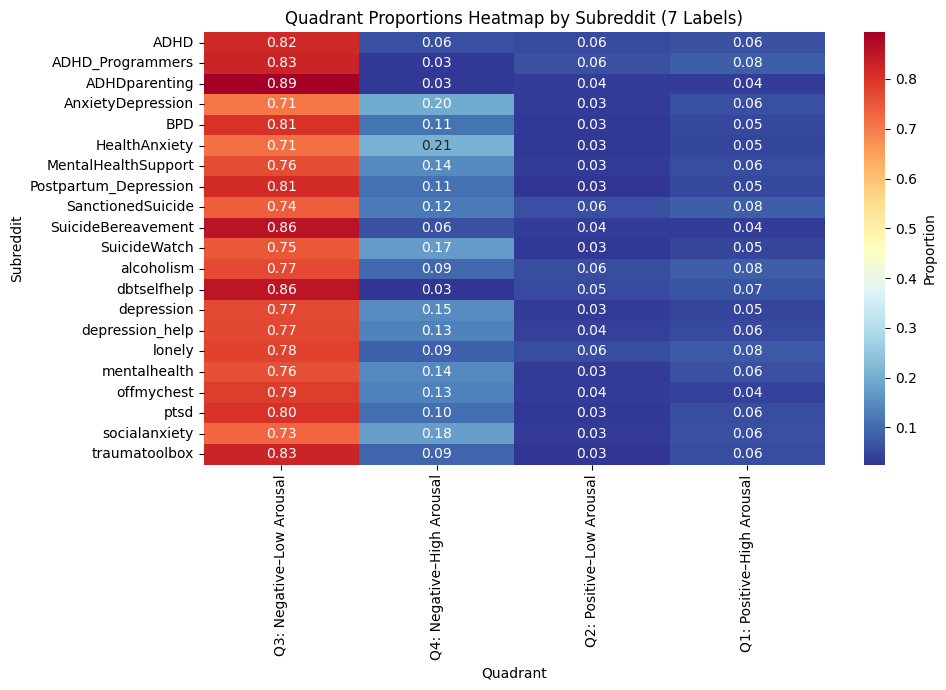

✅ Saved heatmap → ../Circumplex Model/Output/7 Labels/quadrant_heatmap_by_subreddit.png


In [5]:
# ==== Cell 5: Heatmap of quadrant proportions per subreddit ====
import seaborn as sns

# ---- Prepare heatmap data ----
heat_data = props.set_index("subreddit")

plt.figure(figsize=(10,7))
sns.heatmap(
    heat_data,
    annot=True,
    fmt=".2f",
    cmap="RdYlBu_r",
    cbar_kws={"label": "Proportion"}
)
plt.title("Quadrant Proportions Heatmap by Subreddit (7 Labels)")
plt.ylabel("Subreddit")
plt.xlabel("Quadrant")
plt.tight_layout()

# ---- Save heatmap ----
heat_path = os.path.join(OUT_DIR, "quadrant_heatmap_by_subreddit.png")
plt.savefig(heat_path, dpi=200, bbox_inches="tight")
plt.show()
print(f"✅ Saved heatmap → {heat_path}")

In [6]:
# ==== Cell 6: Rank subreddits by negative vs positive emotional share ====

# ---- Define quadrant groups ----
neg_quads = ["Q3: Negative–Low Arousal", "Q4: Negative–High Arousal"]
pos_quads = ["Q1: Positive–High Arousal", "Q2: Positive–Low Arousal"]

# ---- Compute share of negative & positive posts per subreddit ----
sub_emotion = (
    df.groupby("subreddit")["quadrant"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .reset_index()
)

for q in neg_quads + pos_quads:
    if q not in sub_emotion.columns:
        sub_emotion[q] = 0.0

sub_emotion["negative_share"] = sub_emotion[neg_quads].sum(axis=1)
sub_emotion["positive_share"] = sub_emotion[pos_quads].sum(axis=1)

ranking = (
    sub_emotion[["subreddit", "negative_share", "positive_share"]]
    .sort_values("negative_share", ascending=False)
    .head(10)
)

print("Top 10 subreddits by negative emotional share:")
print(ranking)

# ---- Save ranking ----
rank_path = os.path.join(OUT_DIR, "subreddit_neg_pos_ranking.csv")
ranking.to_csv(rank_path, index=False)
print(f"✅ Saved → {rank_path}")


Top 10 subreddits by negative emotional share:
quadrant              subreddit  negative_share  positive_share
2                 ADHDparenting        0.923974        0.076026
9            SuicideBereavement        0.923896        0.076104
5                 HealthAnxiety        0.922691        0.077309
10                 SuicideWatch        0.922449        0.077551
7         Postpartum_Depression        0.922352        0.077648
17                   offmychest        0.921455        0.078545
13                   depression        0.918292        0.081708
4                           BPD        0.917175        0.082825
20                traumatoolbox        0.916449        0.083551
6           MentalHealthSupport        0.909172        0.090828
✅ Saved → ../Circumplex Model/Output/7 Labels/subreddit_neg_pos_ranking.csv
